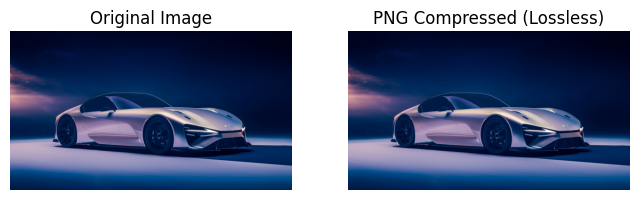

Lossless PNG compression completed. Image displayed successfully.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image_path = "/content/lexus-electrified-sport-concept-3840x2160-8433.jpeg"
image = cv2.imread(image_path)

# Ensure the image is loaded correctly
if image is None:
    raise FileNotFoundError("Image not found. Check the path.")

# Convert BGR to RGB for correct display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lossless Compression - Save as PNG
png_path = "compressed_image.png"
cv2.imwrite(png_path, image, [cv2.IMWRITE_PNG_COMPRESSION, 9])

# Load the compressed PNG image
png_image = cv2.imread(png_path)
png_image_rgb = cv2.cvtColor(png_image, cv2.COLOR_BGR2RGB)

# Display original and PNG compressed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(png_image_rgb)
plt.title("PNG Compressed (Lossless)")
plt.axis("off")

plt.show()

print("Lossless PNG compression completed. Image displayed successfully.")


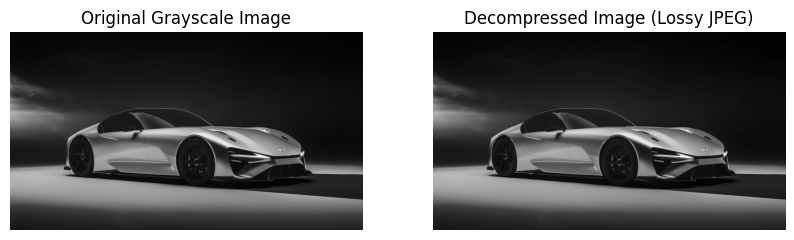

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = "/content/lexus-electrified-sport-concept-3840x2160-8433.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


if image is None:
    raise FileNotFoundError("Image not found. Check the path.")

# Resize the image to a multiple of 8 for block processing
h, w = image.shape
h = h - (h % 8)
w = w - (w % 8)
image = cv2.resize(image, (w, h))

# JPEG Quantization Matrix (Standard Luminance Table)
Q = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 69, 56],
              [14, 17, 22, 29, 51, 87, 80, 62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113, 92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100, 103, 99]])

# Divide the image into 8×8 blocks and apply DCT
block_size = 8
dct_blocks = np.zeros_like(image, dtype=np.float32)

for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        block = np.float32(image[i:i+block_size, j:j+block_size])  # Convert to float
        dct_block = cv2.dct(block)  # Apply DCT
        quantized_block = np.round(dct_block / Q)  # Quantization
        dct_blocks[i:i+block_size, j:j+block_size] = quantized_block  # Store quantized DCT

# Decompression (Reverse Quantization and IDCT)
reconstructed_image = np.zeros_like(image, dtype=np.float32)

for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        quantized_block = dct_blocks[i:i+block_size, j:j+block_size]
        dequantized_block = quantized_block * Q  # Dequantization
        idct_block = cv2.idct(dequantized_block)  # Apply IDCT
        reconstructed_image[i:i+block_size, j:j+block_size] = idct_block  # Store decompressed block

# Convert to uint8 for display
reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Decompressed Image (Lossy JPEG)")
plt.axis("off")

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 - 34s - 46ms/step - accuracy: 0.9130 - loss: 0.2810 - val_accuracy: 0.9785 - val_loss: 0.0688
Epoch 2/10
750/750 - 22s - 30ms/step - accuracy: 0.9692 - loss: 0.1004 - val_accuracy: 0.9853 - val_loss: 0.0501
Epoch 3/10
750/750 - 41s - 54ms/step - accuracy: 0.9779 - loss: 0.0728 - val_accuracy: 0.9873 - val_loss: 0.0420
Epoch 4/10
750/750 - 41s - 54ms/step - accuracy: 0.9825 - loss: 0.0591 - val_accuracy: 0.9872 - val_loss: 0.0441
Epoch 5/10
750/750 - 41s - 55ms/step - accuracy: 0.9851 - loss: 0.0489 - val_accuracy: 0.9879 - val_loss: 0.0399
Epoch 6/10
750/750 - 41s - 55ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 7/10
750/750 - 41s - 55ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9892 - val_loss: 0.0380
Epoch 8/10
750/750 - 22s - 29ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9895 - val_loss: 0.0388
Epoch 9/10
750/750 - 41s - 55ms/step - accuracy: 0.9902 - loss: 0.0300 - val_accuracy: 0.9904 - 

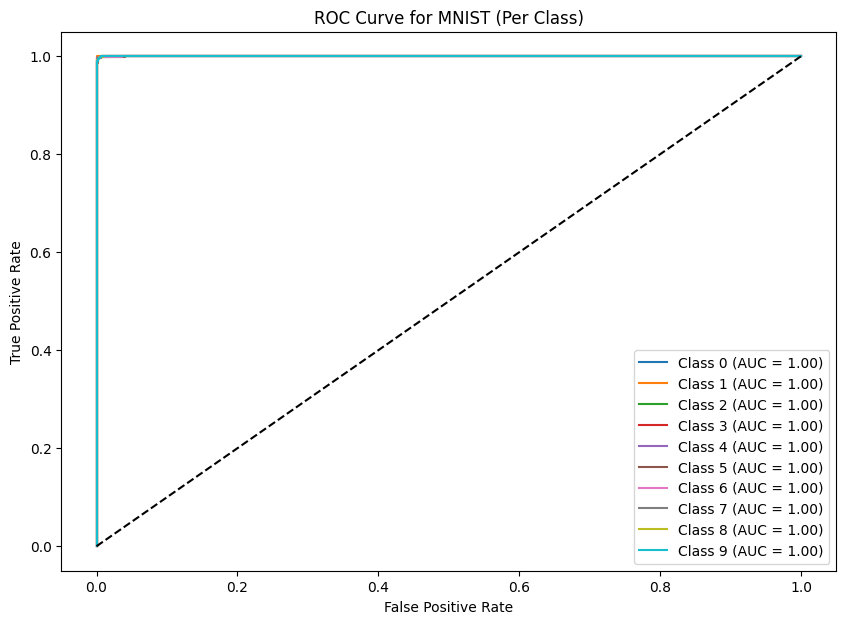

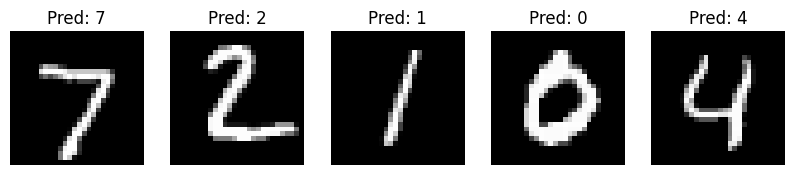

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 28s - 44ms/step - accuracy: 0.3882 - loss: 1.6864 - val_accuracy: 0.5293 - val_loss: 1.3606
Epoch 2/10
625/625 - 41s - 65ms/step - accuracy: 0.5046 - loss: 1.3777 - val_accuracy: 0.5880 - val_loss: 1.1859
Epoch 3/10
625/625 - 41s - 65ms/step - accuracy: 0.5588 - loss: 1.2462 - val_accuracy: 0.6091 - val_loss: 1.1288
Epoch 4/10
625/625 - 26s - 42ms/step - accuracy: 0.5911 - loss: 1.1563 - val_accuracy: 0.6362 - val_loss: 1.0546
Epoch 5/10
625/625 - 42s - 67ms/step - accuracy: 0.6143 - loss: 1.1012 - val_accuracy: 0.6581 - val_loss: 0.9818
Epoch 6/10
625/625 - 27s - 43ms/step - accuracy: 0.6320 - loss: 1.0458 - val_accuracy: 0.6602 - val_loss: 0.9680
Epoch 7/10
625/625 - 41s - 66ms/step - accuracy: 0.6474 - loss: 1.0062 - val_accuracy: 0.6600 - val_loss: 0.9762
Epoch 8/10
625/625 - 40s - 65ms/step - accuracy: 0.6600 - loss: 0.9677 - val_accuracy: 0.6700 - val_loss: 0.9417
Epoch 9/10
625/625 - 41s - 66ms/step - accuracy: 0.6708 - loss: 0.9325 - val_accuracy: 0.6864 - 

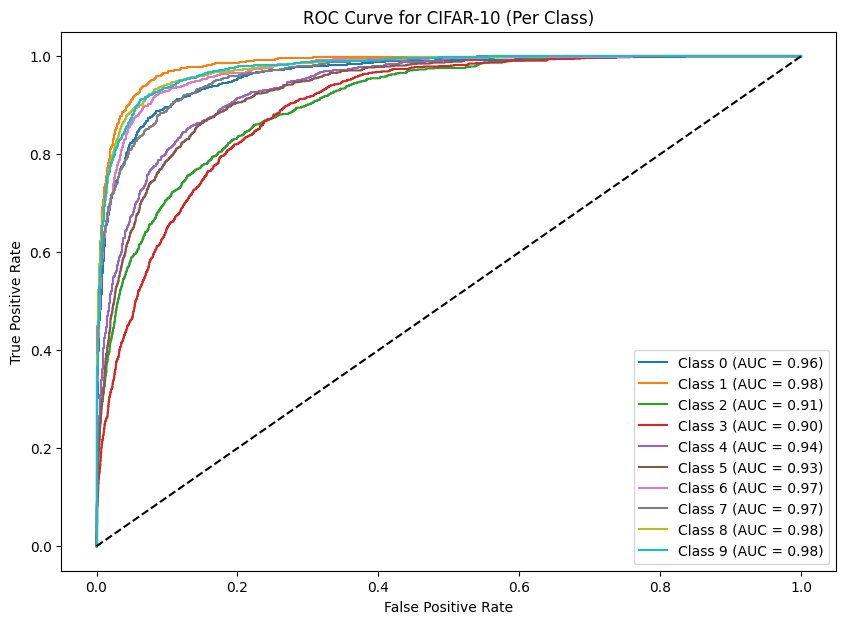

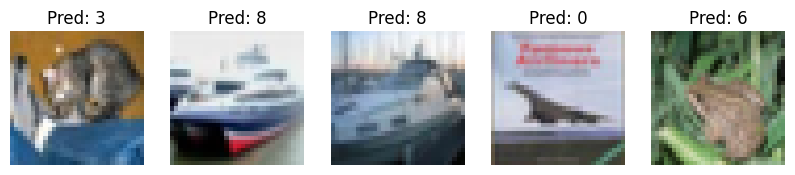

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def train_cnn(dataset_name):
    if dataset_name == "MNIST":
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
        X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
        input_shape = (28, 28, 1)
        num_classes = 10
    elif dataset_name == "CIFAR-10":
        (X_train, y_train), (X_test, y_test) = cifar10.load_data()
        X_train = X_train / 255.0
        X_test = X_test / 255.0
        input_shape = (32, 32, 3)
        num_classes = 10
    else:
        raise ValueError("Invalid dataset. Choose 'MNIST' or 'CIFAR-10'.")

    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=2)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Accuracy, Precision, Recall, F1-score
    report = classification_report(y_true, y_pred_classes, output_dict=True)
    print(f"\n{dataset_name} Results:")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Precision: {report['weighted avg']['precision']}")
    print(f"Recall: {report['weighted avg']['recall']}")
    print(f"F1-score: {report['weighted avg']['f1-score']}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    print("Confusion Matrix:\n", cm)

    # ROC Curve & AUC for each class
    plt.figure(figsize=(10, 7))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {dataset_name} (Per Class)")
    plt.legend(loc="lower right")
    plt.show()

    # Display sample test images with predictions
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        if dataset_name == "MNIST":
            plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
        else:
            plt.imshow(X_test[i])
        plt.title(f"Pred: {y_pred_classes[i]}")
        plt.axis("off")
    plt.show()

# Train CNN on MNIST
train_cnn("MNIST")

# Train CNN on CIFAR-10
train_cnn("CIFAR-10")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

# Convert labels to one-hot encoding for ROC curve
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Optimized CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model with learning rate schedule
initial_learning_rate = 0.001
def lr_schedule(epoch):
    return initial_learning_rate * (0.5 ** (epoch // 10))

optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_test, y_test),
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

# Evaluate model
model.evaluate(x_test, y_test)

# Generate Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Classification Report
report = classification_report(y_true, y_pred_classes, output_dict=True)
print("\nCIFAR-10 Results:")
print(f"Accuracy: {report['accuracy']}")
print(f"Precision: {report['weighted avg']['precision']}")
print(f"Recall: {report['weighted avg']['recall']}")
print(f"F1-score: {report['weighted avg']['f1-score']}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# ROC Curve & AUC for each class
plt.figure(figsize=(10, 7))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CIFAR-10 (Per Class)")
plt.legend(loc="lower right")
plt.show()

# Display sample test images with predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis("off")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 883s 1s/step - accuracy: 0.3360 - loss: 3.7985 - val_accuracy: 0.5573 - val_loss: 2.4267 - learning_rate: 0.0010
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 932s 1s/step - accuracy: 0.5802 - loss: 2.2715 - val_accuracy: 0.6044 - val_loss: 1.9321 - learning_rate: 0.0010
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 925s 1s/step - accuracy: 0.6632 - loss: 1.7230 - val_accuracy: 0.6352 - val_loss: 1.8323 - learning_rate: 0.0010
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 923s 1s/step - accuracy: 0.6836 - loss: 1.6553 - val_accuracy: 0.7427 - val_loss: 1.5289 - learning_rate: 0.0010
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 928s 1s/step - accuracy: 0.7085 - loss: 1.6357 - val_accuracy: 0.6267 - val_loss: 2.0577 - learning_rate: 0.0010
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 889s 1s/step - accuracy: 0.7120 - loss: 1.6482 - val_accuracy: 0.6355 - val_loss: 2.0794 - learning_rate: 0.0010
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 883s 1s/step - accuracy: 0.7280 - loss: 1.6160 - val_